### Step 0: To start ... 

In [172]:
# Turn on multi-threading on your computer for faster calculation 
%env OMP_NUM_THREADS = 4

env: OMP_NUM_THREADS=4


# Steps 1 and 2: Install and load the necessary packages and libraries

In [173]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

# Step 3: Load the data

In [174]:
df = pd.read_csv('RMCase.csv', header = 0) #, encoding = "ISO-8859-1")

df.head() 

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,...,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
0,1,HS,4.0,4.0,CA,0.0,1.0,A,1/14/2011,1/14/2011,...,K,Elementary,K->Elementary,H,1.0,0.063646,0.936508,4.0,L,1.0
1,2,HC,8.0,8.0,AZ,0.0,7.0,A,1/14/2011,1/21/2011,...,Middle,Middle,Middle->Middle,H,1.0,0.025882,0.880000,3.0,L,1.0
2,3,HD,8.0,8.0,FL,0.0,3.0,A,1/15/2011,1/17/2011,...,Middle,Middle,Middle->Middle,H,1.0,0.025131,0.888889,3.0,L,1.0
3,4,HN,9.0,12.0,VA,1.0,3.0,B,1/15/2011,1/17/2011,...,Undefined,Undefined,Undefined->Undefined,H,0.0,NaN,1.000000,0.0,NaN,0.0
4,5,HD,6.0,8.0,FL,0.0,6.0,T,1/16/2011,1/21/2011,...,Middle,Middle,Middle->Middle,H,0.0,0.112500,0.910112,8.0,M-L,0.0


# Step 4: "Cleaning" the data

In this case the data are purposefully left slightly "dirty", that is, they are pre-cleaned somewhat, but for learning purposes some elements of dirty data still remain: 

1. Some datafields (variables, features, columns) have incorrect types -- they should be converted, for instance, from numbers to categoricals 
    
2. Some categorical variables have too many categories (levels), and some of the levels are too rare: for instance, there is only one group from Bahamas (why is this a problem?) -- such data should be merged into more populous category
    
3. Some data are missing and we need to replace or impute them 

To conclude data cleaning we will, of course, have to create dummy variables for the categorical variables
 

In [175]:
df.info() # Checking what kinds of data we have 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2390 non-null   object 
 1   Program.Code                    2389 non-null   object 
 2   From.Grade                      2262 non-null   float64
 3   To.Grade                        2239 non-null   float64
 4   Group.State                     2389 non-null   object 
 5   Is.Non.Annual.                  2389 non-null   float64
 6   Days                            2389 non-null   float64
 7   Travel.Type                     2389 non-null   object 
 8   Departure.Date                  2389 non-null   object 
 9   Return.Date                     2389 non-null   object 
 10  Deposit.Date                    2389 non-null   object 
 11  Special.Pay                     470 non-null    object 
 12  Tuition                         23

In [176]:
# "Cleaning" the data -- part 1: converting data types that should be categorical into "category"

df['From.Grade'] = df['From.Grade'].astype('category')
df['To.Grade'] = df['To.Grade'].astype('category')
df['Is.Non.Annual.'] = df['Is.Non.Annual.'].astype('category')
df['Parent.Meeting.Flag'] = df['Parent.Meeting.Flag'].astype('category')
df['Days'] = df['Days'].astype('category')
df['CRM.Segment'] = df['CRM.Segment'].astype('category')
df['MDR.High.Grade'] = df['MDR.High.Grade'].astype('category')
df['School.Sponsor'] = df['School.Sponsor'].astype('category')
df['SingleGradeTripFlag'] = df['SingleGradeTripFlag'].astype('category')

df.info() # let's check the result

#I only converted some variables which I thought would be useful. If you feel other variables that may be useful have their types incorrect, 
#please convert them too!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ID                              2390 non-null   object  
 1   Program.Code                    2389 non-null   object  
 2   From.Grade                      2262 non-null   category
 3   To.Grade                        2239 non-null   category
 4   Group.State                     2389 non-null   object  
 5   Is.Non.Annual.                  2389 non-null   category
 6   Days                            2389 non-null   category
 7   Travel.Type                     2389 non-null   object  
 8   Departure.Date                  2389 non-null   object  
 9   Return.Date                     2389 non-null   object  
 10  Deposit.Date                    2389 non-null   object  
 11  Special.Pay                     470 non-null    object  
 12  Tuition             

In [177]:
# "Cleaning" the data -- part 2: replacing/imputing missing data

pd.DataFrame(df).isna().sum() # Lets check if we have any missing data -- the result shows that yes, and a lot

ID                                   2
Program.Code                         3
From.Grade                         130
To.Grade                           153
Group.State                          3
Is.Non.Annual.                       3
Days                                 3
Travel.Type                          3
Departure.Date                       3
Return.Date                          3
Deposit.Date                         3
Special.Pay                       1922
Tuition                              3
FRP.Active                           3
FRP.Cancelled                        3
FRP.Take.up.percent.                 3
Early.RPL                          676
Latest.RPL                          22
Cancelled.Pax                        3
Total.Discount.Pax                   3
Initial.System.Date                 11
Poverty.Code                       602
Region                               3
CRM.Segment                          7
School.Type                          3
Parent.Meeting.Flag      

In [178]:
# "Cleaning" the data -- part 2: replacing/imputing missing data

# Approach:
# If a categorical feature is missing: add new category 'missing_value' 
# For Numerical features: replacing with 0 (or median, mean, or most frequent value, etc.) An alternative approach is to imputate, see here: https://scikit-learn.org/stable/modules/impute.html 

# fixing categoricals
imputer = SimpleImputer(missing_values = np.nan, strategy='constant',fill_value="Missing")
imputer.fit(df.select_dtypes(exclude=['int64','float64']))
df[df.select_dtypes(exclude=['int64','float64']).columns] = imputer.transform(df.select_dtypes(exclude=['int64','float64']))
           
# fixing numericals 
imputer = SimpleImputer(missing_values = np.nan, strategy='constant', fill_value=0)
imputer.fit(df.select_dtypes(include=['int64','float64']))
df[df.select_dtypes(include=['int64','float64']).columns] = imputer.transform(df.select_dtypes(include=['int64','float64']))

# Lets examine the result, e.g., datafield "Poverty.Code"
df[['Poverty.Code']]


,Poverty.Code
0,B
1,C
2,C
3,Missing
4,D
...,...
2387,Missing
2388,B
2389,Missing
2390,Missing


In [179]:
# "Cleaning" the data -- part 3: combining rare categories ("levels")

df['Group.State'].value_counts() # To get the intuition lets examine the column Group.State

# Here is the code to check all columns, in case you're interested
# for col in df.select_dtypes(include=['category','object','bool']).columns:
#    print(col)
#    print(df[col].value_counts())
#    print('\n') 


CA                718
TX                308
WA                147
IL                104
CO                 89
MI                 71
FL                 62
AZ                 53
OH                 53
OR                 51
MN                 51
WI                 46
IN                 43
MO                 43
NE                 42
TN                 38
MA                 36
IA                 35
OK                 33
LA                 31
KS                 26
GA                 22
AL                 21
NM                 20
NV                 20
NY                 19
VA                 18
KY                 16
NC                 16
MD                 15
CT                 15
ID                 14
SD                 11
SC                 10
AR                 10
UT                  9
HI                  9
MS                  9
ME                  7
NH                  7
MT                  6
NJ                  6
ND                  5
AK                  5
PA                  5
RI        

In [180]:
# "Cleaning" the data -- part 3: combining rare categories ("levels")

# Here is a custom function that we will call CombineRareCategories
# this function has two arguments: the name of the dataframe (data) and the minimal number of datapoints to remain a separate category (mincount)
# this function will loop through all the columns in the dataframe, and will combine all categories that appear in the data les than mincount number of times into (Other)

def CombineRareCategories(data, mincount):
    for col in data.columns:
        if (type(data[col][0]) == str):
            for index, row in pd.DataFrame(data[col].value_counts()).iterrows():
                if ( row[0] < mincount):
                    df[col].replace(index, 'Other_' + col, inplace = True)
                else:
                    None

# lets apply this functino to our data with mincount=20. You can try lowering this cut-off too!                    
CombineRareCategories(df, 20)        

df[0:10] #lets check the result

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,...,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
0,Other_ID,HS,4.0,4.0,CA,0.0,1.0,A,Other_Departure.Date,Other_Return.Date,...,K,Elementary,K->Elementary,H,1.0,0.063646,0.936508,4.0,L,1.0
1,Other_ID,HC,8.0,8.0,AZ,0.0,7.0,A,Other_Departure.Date,Other_Return.Date,...,Middle,Middle,Middle->Middle,H,1.0,0.025882,0.880000,3.0,L,1.0
2,Other_ID,HD,8.0,8.0,FL,0.0,3.0,A,Other_Departure.Date,Other_Return.Date,...,Middle,Middle,Middle->Middle,H,1.0,0.025131,0.888889,3.0,L,1.0
3,Other_ID,HN,9.0,12.0,Other_Group.State,1.0,3.0,B,Other_Departure.Date,Other_Return.Date,...,Undefined,Undefined,Undefined->Undefined,H,0.0,0.000000,1.000000,0.0,Missing,0.0
4,Other_ID,HD,6.0,8.0,FL,0.0,6.0,Other_Travel.Type,Other_Departure.Date,Other_Return.Date,...,Middle,Middle,Middle->Middle,H,0.0,0.112500,0.910112,8.0,M-L,0.0
5,Other_ID,HC,10.0,12.0,LA,0.0,4.0,A,Other_Departure.Date,Other_Return.Date,...,High,High,High->High,H,0.0,0.010650,0.909091,1.0,L,1.0
6,Other_ID,SG,11.0,12.0,MA,1.0,6.0,A,Other_Departure.Date,Other_Return.Date,...,High,High,High->High,S,0.0,0.111111,0.925926,2.0,S,0.0
7,Other_ID,Other_Program.Code,9.0,9.0,Other_Group.State,0.0,8.0,A,Other_Departure.Date,Other_Return.Date,...,Undefined,Undefined,Undefined->Undefined,Other_MajorProgramCode,1.0,0.000000,0.928571,1.0,Missing,0.0
8,Other_ID,Other_Program.Code,8.0,8.0,AZ,0.0,8.0,A,Other_Departure.Date,Other_Return.Date,...,Middle,High,Middle->High,C,1.0,0.104000,0.928571,4.0,S-M,1.0
9,Other_ID,HD,8.0,8.0,TX,0.0,4.0,A,Other_Departure.Date,Other_Return.Date,...,PK,Middle,PK->Middle,H,1.0,0.103937,0.916667,6.0,M-L,1.0


In [181]:
# The data is now ready to analyze for you (Make sure you create dummies though!)
df.columns


Index(['ID', 'Program.Code', 'From.Grade', 'To.Grade', 'Group.State',
       'Is.Non.Annual.', 'Days', 'Travel.Type', 'Departure.Date',
       'Return.Date', 'Deposit.Date', 'Special.Pay', 'Tuition', 'FRP.Active',
       'FRP.Cancelled', 'FRP.Take.up.percent.', 'Early.RPL', 'Latest.RPL',
       'Cancelled.Pax', 'Total.Discount.Pax', 'Initial.System.Date',
       'Poverty.Code', 'Region', 'CRM.Segment', 'School.Type',
       'Parent.Meeting.Flag', 'MDR.Low.Grade', 'MDR.High.Grade',
       'Total.School.Enrollment', 'Income.Level', 'EZ.Pay.Take.Up.Rate',
       'School.Sponsor', 'SPR.Product.Type', 'SPR.New.Existing', 'FPP',
       'Total.Pax', 'SPR.Group.Revenue', 'NumberOfMeetingswithParents',
       'FirstMeeting', 'LastMeeting', 'DifferenceTraveltoFirstMeeting',
       'DifferenceTraveltoLastMeeting', 'SchoolGradeTypeLow',
       'SchoolGradeTypeHigh', 'SchoolGradeType', 'DepartureMonth',
       'GroupGradeTypeLow', 'GroupGradeTypeHigh', 'GroupGradeType',
       'MajorProgramCode', '

### There are multiple columns which are not useful, so we can drop them

In [182]:
df=df.drop(['ID','Departure.Date',
       'Return.Date', 'Deposit.Date','Special.Pay','FRP.Take.up.percent.', 'Early.RPL', 'Latest.RPL','Initial.System.Date',
       'Poverty.Code','MDR.Low.Grade', 'MDR.High.Grade','Total.School.Enrollment','EZ.Pay.Take.Up.Rate','FirstMeeting', 'LastMeeting', 'DifferenceTraveltoFirstMeeting',
       'DifferenceTraveltoLastMeeting','SchoolGradeType', 'GroupGradeTypeLow', 'GroupGradeTypeHigh', 'GroupGradeType',
       'MajorProgramCode','FPP.to.School.enrollment','FPP.to.PAX', 'Num.of.Non_FPP.PAX','Tuition','FPP'],axis=1)
df.head()

,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,FRP.Active,FRP.Cancelled,Cancelled.Pax,...,SPR.New.Existing,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,SchoolGradeTypeLow,SchoolGradeTypeHigh,DepartureMonth,SingleGradeTripFlag,SchoolSizeIndicator,Retained.in.2012.
0,HS,4.0,4.0,CA,0.0,1.0,A,25.0,3.0,3.0,...,EXISTING,63.0,424.0,1.0,Elementary,Elementary,Other_DepartureMonth,1.0,L,1.0
1,HC,8.0,8.0,AZ,0.0,7.0,A,9.0,9.0,11.0,...,EXISTING,25.0,2350.0,2.0,Middle,Middle,Other_DepartureMonth,1.0,L,1.0
2,HD,8.0,8.0,FL,0.0,3.0,A,17.0,6.0,6.0,...,EXISTING,27.0,1181.0,1.0,Middle,Middle,Other_DepartureMonth,1.0,L,1.0
3,HN,9.0,12.0,Other_Group.State,1.0,3.0,B,0.0,0.0,1.0,...,EXISTING,18.0,376.0,0.0,High,High,Other_DepartureMonth,0.0,Missing,0.0
4,HD,6.0,8.0,FL,0.0,6.0,Other_Travel.Type,40.0,8.0,9.0,...,EXISTING,89.0,865.0,1.0,Middle,Middle,Other_DepartureMonth,0.0,M-L,0.0


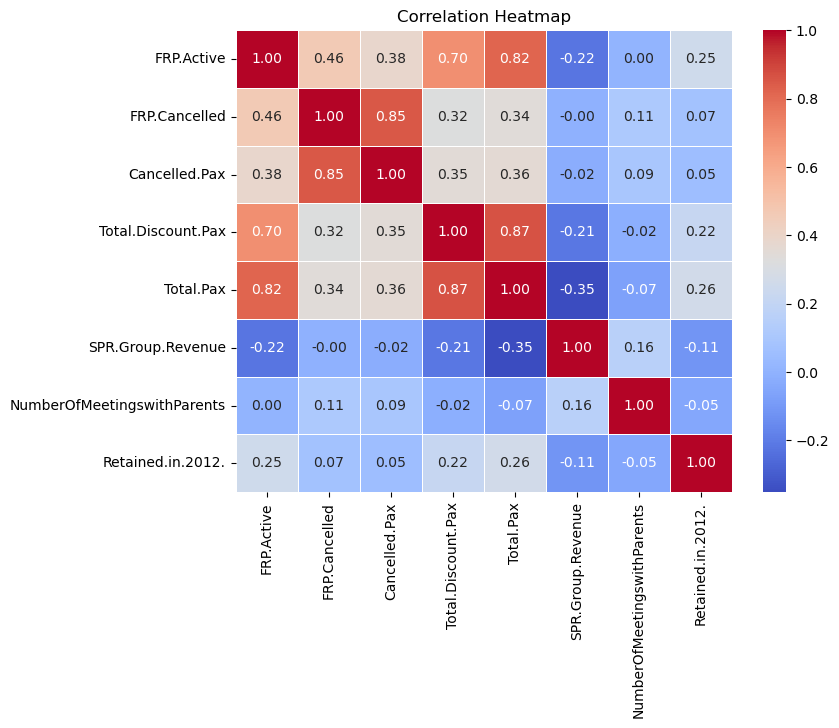

In [183]:
correlation_matrix = df.corr()
correlation_matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [185]:
dfnew = df
dfnew.head()

,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,FRP.Active,FRP.Cancelled,Cancelled.Pax,...,SPR.New.Existing,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,SchoolGradeTypeLow,SchoolGradeTypeHigh,DepartureMonth,SingleGradeTripFlag,SchoolSizeIndicator,Retained.in.2012.
0,HS,4.0,4.0,CA,0.0,1.0,A,25.0,3.0,3.0,...,EXISTING,63.0,424.0,1.0,Elementary,Elementary,Other_DepartureMonth,1.0,L,1.0
1,HC,8.0,8.0,AZ,0.0,7.0,A,9.0,9.0,11.0,...,EXISTING,25.0,2350.0,2.0,Middle,Middle,Other_DepartureMonth,1.0,L,1.0
2,HD,8.0,8.0,FL,0.0,3.0,A,17.0,6.0,6.0,...,EXISTING,27.0,1181.0,1.0,Middle,Middle,Other_DepartureMonth,1.0,L,1.0
3,HN,9.0,12.0,Other_Group.State,1.0,3.0,B,0.0,0.0,1.0,...,EXISTING,18.0,376.0,0.0,High,High,Other_DepartureMonth,0.0,Missing,0.0
4,HD,6.0,8.0,FL,0.0,6.0,Other_Travel.Type,40.0,8.0,9.0,...,EXISTING,89.0,865.0,1.0,Middle,Middle,Other_DepartureMonth,0.0,M-L,0.0


In [186]:
dummydf = pd.get_dummies(df, drop_first=True)

In [187]:
#Partition the data into train and valid. Make sure you set seed
trainData= dummydf.sample(frac=0.7, random_state=2)
# assign rows that are not already in the training set, into validation 
validData = dummydf.drop(trainData.index)

print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)
print()

Training   :  (1674, 150)
Validation :  (718, 150)



In [188]:
column_names = dummydf.columns.tolist()
print(column_names)

['FRP.Active', 'FRP.Cancelled', 'Cancelled.Pax', 'Total.Discount.Pax', 'Total.Pax', 'SPR.Group.Revenue', 'NumberOfMeetingswithParents', 'Retained.in.2012.', 'Program.Code_HC', 'Program.Code_HD', 'Program.Code_HG', 'Program.Code_HN', 'Program.Code_HS', 'Program.Code_HVP', 'Program.Code_Other_Program.Code', 'Program.Code_SC', 'Program.Code_SG', 'Program.Code_SK', 'Program.Code_SM', 'Program.Code_ST', 'From.Grade_4.0', 'From.Grade_5.0', 'From.Grade_6.0', 'From.Grade_7.0', 'From.Grade_8.0', 'From.Grade_9.0', 'From.Grade_10.0', 'From.Grade_11.0', 'From.Grade_12.0', 'From.Grade_Missing', 'To.Grade_4.0', 'To.Grade_5.0', 'To.Grade_6.0', 'To.Grade_7.0', 'To.Grade_8.0', 'To.Grade_9.0', 'To.Grade_10.0', 'To.Grade_11.0', 'To.Grade_12.0', 'To.Grade_Missing', 'Group.State_AZ', 'Group.State_CA', 'Group.State_CO', 'Group.State_FL', 'Group.State_GA', 'Group.State_IA', 'Group.State_IL', 'Group.State_IN', 'Group.State_KS', 'Group.State_LA', 'Group.State_MA', 'Group.State_MI', 'Group.State_MN', 'Group.Sta

In [190]:
column_names = ['FRP.Active', 'FRP.Cancelled', 'Cancelled.Pax', 'Total.Discount.Pax', 'Total.Pax', 'SPR.Group.Revenue', 'NumberOfMeetingswithParents','Program.Code_HC', 'Program.Code_HD', 'Program.Code_HG', 'Program.Code_HN', 'Program.Code_HS', 'Program.Code_HVP', 'Program.Code_Other_Program.Code', 'Program.Code_SC', 'Program.Code_SG', 'Program.Code_SK', 'Program.Code_SM', 'Program.Code_ST', 'From.Grade_4.0', 'From.Grade_5.0', 'From.Grade_6.0', 'From.Grade_7.0', 'From.Grade_8.0', 'From.Grade_9.0', 'From.Grade_10.0', 'From.Grade_11.0', 'From.Grade_12.0', 'From.Grade_Missing', 'To.Grade_4.0', 'To.Grade_5.0', 'To.Grade_6.0', 'To.Grade_7.0', 'To.Grade_8.0', 'To.Grade_9.0', 'To.Grade_10.0', 'To.Grade_11.0', 'To.Grade_12.0', 'To.Grade_Missing', 'Group.State_AZ', 'Group.State_CA', 'Group.State_CO', 'Group.State_FL', 'Group.State_GA', 'Group.State_IA', 'Group.State_IL', 'Group.State_IN', 'Group.State_KS', 'Group.State_LA', 'Group.State_MA', 'Group.State_MI', 'Group.State_MN', 'Group.State_MO', 'Group.State_NE', 'Group.State_NM', 'Group.State_NV', 'Group.State_OH', 'Group.State_OK', 'Group.State_OR', 'Group.State_Other_Group.State', 'Group.State_TN', 'Group.State_TX', 'Group.State_WA', 'Group.State_WI', 'Is.Non.Annual._1.0', 'Is.Non.Annual._Missing', 'Days_2.0', 'Days_3.0', 'Days_4.0', 'Days_5.0', 'Days_6.0', 'Days_7.0', 'Days_8.0', 'Days_9.0', 'Days_10.0', 'Days_11.0', 'Days_12.0', 'Days_Missing', 'Travel.Type_B', 'Travel.Type_Other_Travel.Type', 'Region_Houston', 'Region_Northern California', 'Region_Other', 'Region_Other_Region', 'Region_Pacific Northwest', 'Region_Southern California', 'CRM.Segment_2.0', 'CRM.Segment_3.0', 'CRM.Segment_4.0', 'CRM.Segment_5.0', 'CRM.Segment_6.0', 'CRM.Segment_7.0', 'CRM.Segment_8.0', 'CRM.Segment_9.0', 'CRM.Segment_10.0', 'CRM.Segment_11.0', 'CRM.Segment_Missing', 'School.Type_Catholic', 'School.Type_Other_School.Type', 'School.Type_PUBLIC', 'School.Type_Private non-Christian', 'Parent.Meeting.Flag_1.0', 'Parent.Meeting.Flag_Missing', 'Income.Level_B', 'Income.Level_C', 'Income.Level_D', 'Income.Level_E', 'Income.Level_F', 'Income.Level_G', 'Income.Level_H', 'Income.Level_I', 'Income.Level_J', 'Income.Level_K', 'Income.Level_L', 'Income.Level_M', 'Income.Level_Missing', 'Income.Level_N', 'Income.Level_O', 'Income.Level_Other_Income.Level', 'Income.Level_P', 'Income.Level_Q', 'Income.Level_Z', 'School.Sponsor_1.0', 'School.Sponsor_Missing', 'SPR.Product.Type_Costa Rica', 'SPR.Product.Type_East Coast', 'SPR.Product.Type_Other_SPR.Product.Type', 'SPR.Product.Type_Science', 'SPR.New.Existing_NEW', 'SPR.New.Existing_Other_SPR.New.Existing', 'SchoolGradeTypeLow_High', 'SchoolGradeTypeLow_Middle', 'SchoolGradeTypeLow_Other_SchoolGradeTypeLow', 'SchoolGradeTypeLow_Undefined', 'SchoolGradeTypeHigh_High', 'SchoolGradeTypeHigh_Middle', 'SchoolGradeTypeHigh_Other_SchoolGradeTypeHigh', 'SchoolGradeTypeHigh_Undefined', 'DepartureMonth_February', 'DepartureMonth_June', 'DepartureMonth_March', 'DepartureMonth_May', 'DepartureMonth_Other_DepartureMonth', 'SingleGradeTripFlag_1.0', 'SingleGradeTripFlag_Missing', 'SchoolSizeIndicator_M-L', 'SchoolSizeIndicator_Missing', 'SchoolSizeIndicator_S', 'SchoolSizeIndicator_S-M']
result = ['z' + col for col in column_names]
print(result)

['zFRP.Active', 'zFRP.Cancelled', 'zCancelled.Pax', 'zTotal.Discount.Pax', 'zTotal.Pax', 'zSPR.Group.Revenue', 'zNumberOfMeetingswithParents', 'zProgram.Code_HC', 'zProgram.Code_HD', 'zProgram.Code_HG', 'zProgram.Code_HN', 'zProgram.Code_HS', 'zProgram.Code_HVP', 'zProgram.Code_Other_Program.Code', 'zProgram.Code_SC', 'zProgram.Code_SG', 'zProgram.Code_SK', 'zProgram.Code_SM', 'zProgram.Code_ST', 'zFrom.Grade_4.0', 'zFrom.Grade_5.0', 'zFrom.Grade_6.0', 'zFrom.Grade_7.0', 'zFrom.Grade_8.0', 'zFrom.Grade_9.0', 'zFrom.Grade_10.0', 'zFrom.Grade_11.0', 'zFrom.Grade_12.0', 'zFrom.Grade_Missing', 'zTo.Grade_4.0', 'zTo.Grade_5.0', 'zTo.Grade_6.0', 'zTo.Grade_7.0', 'zTo.Grade_8.0', 'zTo.Grade_9.0', 'zTo.Grade_10.0', 'zTo.Grade_11.0', 'zTo.Grade_12.0', 'zTo.Grade_Missing', 'zGroup.State_AZ', 'zGroup.State_CA', 'zGroup.State_CO', 'zGroup.State_FL', 'zGroup.State_GA', 'zGroup.State_IA', 'zGroup.State_IL', 'zGroup.State_IN', 'zGroup.State_KS', 'zGroup.State_LA', 'zGroup.State_MA', 'zGroup.State_MI'

In [191]:
scaler = preprocessing.StandardScaler()
scaler.fit(trainData[['FRP.Active', 'FRP.Cancelled', 'Cancelled.Pax', 'Total.Discount.Pax', 'Total.Pax', 'SPR.Group.Revenue', 'NumberOfMeetingswithParents','Program.Code_HC', 'Program.Code_HD', 'Program.Code_HG', 'Program.Code_HN', 'Program.Code_HS', 'Program.Code_HVP', 'Program.Code_Other_Program.Code', 'Program.Code_SC', 'Program.Code_SG', 'Program.Code_SK', 'Program.Code_SM', 'Program.Code_ST', 'From.Grade_4.0', 'From.Grade_5.0', 'From.Grade_6.0', 'From.Grade_7.0', 'From.Grade_8.0', 'From.Grade_9.0', 'From.Grade_10.0', 'From.Grade_11.0', 'From.Grade_12.0', 'From.Grade_Missing', 'To.Grade_4.0', 'To.Grade_5.0', 'To.Grade_6.0', 'To.Grade_7.0', 'To.Grade_8.0', 'To.Grade_9.0', 'To.Grade_10.0', 'To.Grade_11.0', 'To.Grade_12.0', 'To.Grade_Missing', 'Group.State_AZ', 'Group.State_CA', 'Group.State_CO', 'Group.State_FL', 'Group.State_GA', 'Group.State_IA', 'Group.State_IL', 'Group.State_IN', 'Group.State_KS', 'Group.State_LA', 'Group.State_MA', 'Group.State_MI', 'Group.State_MN', 'Group.State_MO', 'Group.State_NE', 'Group.State_NM', 'Group.State_NV', 'Group.State_OH', 'Group.State_OK', 'Group.State_OR', 'Group.State_Other_Group.State', 'Group.State_TN', 'Group.State_TX', 'Group.State_WA', 'Group.State_WI', 'Is.Non.Annual._1.0', 'Is.Non.Annual._Missing', 'Days_2.0', 'Days_3.0', 'Days_4.0', 'Days_5.0', 'Days_6.0', 'Days_7.0', 'Days_8.0', 'Days_9.0', 'Days_10.0', 'Days_11.0', 'Days_12.0', 'Days_Missing', 'Travel.Type_B', 'Travel.Type_Other_Travel.Type', 'Region_Houston', 'Region_Northern California', 'Region_Other', 'Region_Other_Region', 'Region_Pacific Northwest', 'Region_Southern California', 'CRM.Segment_2.0', 'CRM.Segment_3.0', 'CRM.Segment_4.0', 'CRM.Segment_5.0', 'CRM.Segment_6.0', 'CRM.Segment_7.0', 'CRM.Segment_8.0', 'CRM.Segment_9.0', 'CRM.Segment_10.0', 'CRM.Segment_11.0', 'CRM.Segment_Missing', 'School.Type_Catholic', 'School.Type_Other_School.Type', 'School.Type_PUBLIC', 'School.Type_Private non-Christian', 'Parent.Meeting.Flag_1.0', 'Parent.Meeting.Flag_Missing', 'Income.Level_B', 'Income.Level_C', 'Income.Level_D', 'Income.Level_E', 'Income.Level_F', 'Income.Level_G', 'Income.Level_H', 'Income.Level_I', 'Income.Level_J', 'Income.Level_K', 'Income.Level_L', 'Income.Level_M', 'Income.Level_Missing', 'Income.Level_N', 'Income.Level_O', 'Income.Level_Other_Income.Level', 'Income.Level_P', 'Income.Level_Q', 'Income.Level_Z', 'School.Sponsor_1.0', 'School.Sponsor_Missing', 'SPR.Product.Type_Costa Rica', 'SPR.Product.Type_East Coast', 'SPR.Product.Type_Other_SPR.Product.Type', 'SPR.Product.Type_Science', 'SPR.New.Existing_NEW', 'SPR.New.Existing_Other_SPR.New.Existing', 'SchoolGradeTypeLow_High', 'SchoolGradeTypeLow_Middle', 'SchoolGradeTypeLow_Other_SchoolGradeTypeLow', 'SchoolGradeTypeLow_Undefined', 'SchoolGradeTypeHigh_High', 'SchoolGradeTypeHigh_Middle', 'SchoolGradeTypeHigh_Other_SchoolGradeTypeHigh', 'SchoolGradeTypeHigh_Undefined', 'DepartureMonth_February', 'DepartureMonth_June', 'DepartureMonth_March', 'DepartureMonth_May', 'DepartureMonth_Other_DepartureMonth', 'SingleGradeTripFlag_1.0', 'SingleGradeTripFlag_Missing', 'SchoolSizeIndicator_M-L', 'SchoolSizeIndicator_Missing', 'SchoolSizeIndicator_S', 'SchoolSizeIndicator_S-M']])  # Note the use of an array of column names

# Transform the full dataset
dfnorm = pd.DataFrame(scaler.transform(dummydf[['FRP.Active', 'FRP.Cancelled', 'Cancelled.Pax', 'Total.Discount.Pax', 'Total.Pax', 'SPR.Group.Revenue', 'NumberOfMeetingswithParents','Program.Code_HC', 'Program.Code_HD', 'Program.Code_HG', 'Program.Code_HN', 'Program.Code_HS', 'Program.Code_HVP', 'Program.Code_Other_Program.Code', 'Program.Code_SC', 'Program.Code_SG', 'Program.Code_SK', 'Program.Code_SM', 'Program.Code_ST', 'From.Grade_4.0', 'From.Grade_5.0', 'From.Grade_6.0', 'From.Grade_7.0', 'From.Grade_8.0', 'From.Grade_9.0', 'From.Grade_10.0', 'From.Grade_11.0', 'From.Grade_12.0', 'From.Grade_Missing', 'To.Grade_4.0', 'To.Grade_5.0', 'To.Grade_6.0', 'To.Grade_7.0', 'To.Grade_8.0', 'To.Grade_9.0', 'To.Grade_10.0', 'To.Grade_11.0', 'To.Grade_12.0', 'To.Grade_Missing', 'Group.State_AZ', 'Group.State_CA', 'Group.State_CO', 'Group.State_FL', 'Group.State_GA', 'Group.State_IA', 'Group.State_IL', 'Group.State_IN', 'Group.State_KS', 'Group.State_LA', 'Group.State_MA', 'Group.State_MI', 'Group.State_MN', 'Group.State_MO', 'Group.State_NE', 'Group.State_NM', 'Group.State_NV', 'Group.State_OH', 'Group.State_OK', 'Group.State_OR', 'Group.State_Other_Group.State', 'Group.State_TN', 'Group.State_TX', 'Group.State_WA', 'Group.State_WI', 'Is.Non.Annual._1.0', 'Is.Non.Annual._Missing', 'Days_2.0', 'Days_3.0', 'Days_4.0', 'Days_5.0', 'Days_6.0', 'Days_7.0', 'Days_8.0', 'Days_9.0', 'Days_10.0', 'Days_11.0', 'Days_12.0', 'Days_Missing', 'Travel.Type_B', 'Travel.Type_Other_Travel.Type', 'Region_Houston', 'Region_Northern California', 'Region_Other', 'Region_Other_Region', 'Region_Pacific Northwest', 'Region_Southern California', 'CRM.Segment_2.0', 'CRM.Segment_3.0', 'CRM.Segment_4.0', 'CRM.Segment_5.0', 'CRM.Segment_6.0', 'CRM.Segment_7.0', 'CRM.Segment_8.0', 'CRM.Segment_9.0', 'CRM.Segment_10.0', 'CRM.Segment_11.0', 'CRM.Segment_Missing', 'School.Type_Catholic', 'School.Type_Other_School.Type', 'School.Type_PUBLIC', 'School.Type_Private non-Christian', 'Parent.Meeting.Flag_1.0', 'Parent.Meeting.Flag_Missing', 'Income.Level_B', 'Income.Level_C', 'Income.Level_D', 'Income.Level_E', 'Income.Level_F', 'Income.Level_G', 'Income.Level_H', 'Income.Level_I', 'Income.Level_J', 'Income.Level_K', 'Income.Level_L', 'Income.Level_M', 'Income.Level_Missing', 'Income.Level_N', 'Income.Level_O', 'Income.Level_Other_Income.Level', 'Income.Level_P', 'Income.Level_Q', 'Income.Level_Z', 'School.Sponsor_1.0', 'School.Sponsor_Missing', 'SPR.Product.Type_Costa Rica', 'SPR.Product.Type_East Coast', 'SPR.Product.Type_Other_SPR.Product.Type', 'SPR.Product.Type_Science', 'SPR.New.Existing_NEW', 'SPR.New.Existing_Other_SPR.New.Existing', 'SchoolGradeTypeLow_High', 'SchoolGradeTypeLow_Middle', 'SchoolGradeTypeLow_Other_SchoolGradeTypeLow', 'SchoolGradeTypeLow_Undefined', 'SchoolGradeTypeHigh_High', 'SchoolGradeTypeHigh_Middle', 'SchoolGradeTypeHigh_Other_SchoolGradeTypeHigh', 'SchoolGradeTypeHigh_Undefined', 'DepartureMonth_February', 'DepartureMonth_June', 'DepartureMonth_March', 'DepartureMonth_May', 'DepartureMonth_Other_DepartureMonth', 'SingleGradeTripFlag_1.0', 'SingleGradeTripFlag_Missing', 'SchoolSizeIndicator_M-L', 'SchoolSizeIndicator_Missing', 'SchoolSizeIndicator_S', 'SchoolSizeIndicator_S-M']]), 
                                   columns=['zFRP.Active', 'zFRP.Cancelled', 'zCancelled.Pax', 'zTotal.Discount.Pax', 'zTotal.Pax', 'zSPR.Group.Revenue', 'zNumberOfMeetingswithParents', 'zProgram.Code_HC', 'zProgram.Code_HD', 'zProgram.Code_HG', 'zProgram.Code_HN', 'zProgram.Code_HS', 'zProgram.Code_HVP', 'zProgram.Code_Other_Program.Code', 'zProgram.Code_SC', 'zProgram.Code_SG', 'zProgram.Code_SK', 'zProgram.Code_SM', 'zProgram.Code_ST', 'zFrom.Grade_4.0', 'zFrom.Grade_5.0', 'zFrom.Grade_6.0', 'zFrom.Grade_7.0', 'zFrom.Grade_8.0', 'zFrom.Grade_9.0', 'zFrom.Grade_10.0', 'zFrom.Grade_11.0', 'zFrom.Grade_12.0', 'zFrom.Grade_Missing', 'zTo.Grade_4.0', 'zTo.Grade_5.0', 'zTo.Grade_6.0', 'zTo.Grade_7.0', 'zTo.Grade_8.0', 'zTo.Grade_9.0', 'zTo.Grade_10.0', 'zTo.Grade_11.0', 'zTo.Grade_12.0', 'zTo.Grade_Missing', 'zGroup.State_AZ', 'zGroup.State_CA', 'zGroup.State_CO', 'zGroup.State_FL', 'zGroup.State_GA', 'zGroup.State_IA', 'zGroup.State_IL', 'zGroup.State_IN', 'zGroup.State_KS', 'zGroup.State_LA', 'zGroup.State_MA', 'zGroup.State_MI', 'zGroup.State_MN', 'zGroup.State_MO', 'zGroup.State_NE', 'zGroup.State_NM', 'zGroup.State_NV', 'zGroup.State_OH', 'zGroup.State_OK', 'zGroup.State_OR', 'zGroup.State_Other_Group.State', 'zGroup.State_TN', 'zGroup.State_TX', 'zGroup.State_WA', 'zGroup.State_WI', 'zIs.Non.Annual._1.0', 'zIs.Non.Annual._Missing', 'zDays_2.0', 'zDays_3.0', 'zDays_4.0', 'zDays_5.0', 'zDays_6.0', 'zDays_7.0', 'zDays_8.0', 'zDays_9.0', 'zDays_10.0', 'zDays_11.0', 'zDays_12.0', 'zDays_Missing', 'zTravel.Type_B', 'zTravel.Type_Other_Travel.Type', 'zRegion_Houston', 'zRegion_Northern California', 'zRegion_Other', 'zRegion_Other_Region', 'zRegion_Pacific Northwest', 'zRegion_Southern California', 'zCRM.Segment_2.0', 'zCRM.Segment_3.0', 'zCRM.Segment_4.0', 'zCRM.Segment_5.0', 'zCRM.Segment_6.0', 'zCRM.Segment_7.0', 'zCRM.Segment_8.0', 'zCRM.Segment_9.0', 'zCRM.Segment_10.0', 'zCRM.Segment_11.0', 'zCRM.Segment_Missing', 'zSchool.Type_Catholic', 'zSchool.Type_Other_School.Type', 'zSchool.Type_PUBLIC', 'zSchool.Type_Private non-Christian', 'zParent.Meeting.Flag_1.0', 'zParent.Meeting.Flag_Missing', 'zIncome.Level_B', 'zIncome.Level_C', 'zIncome.Level_D', 'zIncome.Level_E', 'zIncome.Level_F', 'zIncome.Level_G', 'zIncome.Level_H', 'zIncome.Level_I', 'zIncome.Level_J', 'zIncome.Level_K', 'zIncome.Level_L', 'zIncome.Level_M', 'zIncome.Level_Missing', 'zIncome.Level_N', 'zIncome.Level_O', 'zIncome.Level_Other_Income.Level', 'zIncome.Level_P', 'zIncome.Level_Q', 'zIncome.Level_Z', 'zSchool.Sponsor_1.0', 'zSchool.Sponsor_Missing', 'zSPR.Product.Type_Costa Rica', 'zSPR.Product.Type_East Coast', 'zSPR.Product.Type_Other_SPR.Product.Type', 'zSPR.Product.Type_Science', 'zSPR.New.Existing_NEW', 'zSPR.New.Existing_Other_SPR.New.Existing', 'zSchoolGradeTypeLow_High', 'zSchoolGradeTypeLow_Middle', 'zSchoolGradeTypeLow_Other_SchoolGradeTypeLow', 'zSchoolGradeTypeLow_Undefined', 'zSchoolGradeTypeHigh_High', 'zSchoolGradeTypeHigh_Middle', 'zSchoolGradeTypeHigh_Other_SchoolGradeTypeHigh', 'zSchoolGradeTypeHigh_Undefined', 'zDepartureMonth_February', 'zDepartureMonth_June', 'zDepartureMonth_March', 'zDepartureMonth_May', 'zDepartureMonth_Other_DepartureMonth', 'zSingleGradeTripFlag_1.0', 'zSingleGradeTripFlag_Missing', 'zSchoolSizeIndicator_M-L', 'zSchoolSizeIndicator_Missing', 'zSchoolSizeIndicator_S', 'zSchoolSizeIndicator_S-M'])

dfnorm['Retained.in.2012.']=dummydf['Retained.in.2012.']


# Use iloc with the indices of trainData and validData
trainNorm = dfnorm[dfnorm.index.isin(trainData.index)]
validNorm = dfnorm[dfnorm.index.isin(validData.index)]

print(trainNorm)
print(validNorm)

      zFRP.Active  zFRP.Cancelled  zCancelled.Pax  zTotal.Discount.Pax  \
0        0.457330       -0.093809       -0.391804             0.336308   
1       -0.458081        1.473937        1.315661            -0.000201   
2       -0.000376        0.690064        0.248495            -0.000201   
3       -0.973000       -0.877682       -0.818670            -1.009727   
4        1.315527        1.212646        0.888795             1.682343   
...           ...             ...             ...                  ...   
2387    -0.801361       -0.355100       -0.818670            -0.673219   
2388    -0.114802        1.473937        2.596260            -0.000201   
2389    -0.973000       -0.877682       -1.032104            -1.009727   
2390    -0.973000       -0.877682       -1.032104            -1.009727   
2391    -0.973000       -0.877682       -1.032104            -1.009727   

      zTotal.Pax  zSPR.Group.Revenue  zNumberOfMeetingswithParents  \
0       0.880606           -1.852523     

In [192]:
knn = KNeighborsClassifier(n_neighbors=3).fit(trainNorm[['zFRP.Active', 'zFRP.Cancelled', 'zCancelled.Pax', 'zTotal.Discount.Pax', 'zTotal.Pax', 'zSPR.Group.Revenue', 'zNumberOfMeetingswithParents', 'zProgram.Code_HC', 'zProgram.Code_HD', 'zProgram.Code_HG', 'zProgram.Code_HN', 'zProgram.Code_HS', 'zProgram.Code_HVP', 'zProgram.Code_Other_Program.Code', 'zProgram.Code_SC', 'zProgram.Code_SG', 'zProgram.Code_SK', 'zProgram.Code_SM', 'zProgram.Code_ST', 'zFrom.Grade_4.0', 'zFrom.Grade_5.0', 'zFrom.Grade_6.0', 'zFrom.Grade_7.0', 'zFrom.Grade_8.0', 'zFrom.Grade_9.0', 'zFrom.Grade_10.0', 'zFrom.Grade_11.0', 'zFrom.Grade_12.0', 'zFrom.Grade_Missing', 'zTo.Grade_4.0', 'zTo.Grade_5.0', 'zTo.Grade_6.0', 'zTo.Grade_7.0', 'zTo.Grade_8.0', 'zTo.Grade_9.0', 'zTo.Grade_10.0', 'zTo.Grade_11.0', 'zTo.Grade_12.0', 'zTo.Grade_Missing', 'zGroup.State_AZ', 'zGroup.State_CA', 'zGroup.State_CO', 'zGroup.State_FL', 'zGroup.State_GA', 'zGroup.State_IA', 'zGroup.State_IL', 'zGroup.State_IN', 'zGroup.State_KS', 'zGroup.State_LA', 'zGroup.State_MA', 'zGroup.State_MI', 'zGroup.State_MN', 'zGroup.State_MO', 'zGroup.State_NE', 'zGroup.State_NM', 'zGroup.State_NV', 'zGroup.State_OH', 'zGroup.State_OK', 'zGroup.State_OR', 'zGroup.State_Other_Group.State', 'zGroup.State_TN', 'zGroup.State_TX', 'zGroup.State_WA', 'zGroup.State_WI', 'zIs.Non.Annual._1.0', 'zIs.Non.Annual._Missing', 'zDays_2.0', 'zDays_3.0', 'zDays_4.0', 'zDays_5.0', 'zDays_6.0', 'zDays_7.0', 'zDays_8.0', 'zDays_9.0', 'zDays_10.0', 'zDays_11.0', 'zDays_12.0', 'zDays_Missing', 'zTravel.Type_B', 'zTravel.Type_Other_Travel.Type', 'zRegion_Houston', 'zRegion_Northern California', 'zRegion_Other', 'zRegion_Other_Region', 'zRegion_Pacific Northwest', 'zRegion_Southern California', 'zCRM.Segment_2.0', 'zCRM.Segment_3.0', 'zCRM.Segment_4.0', 'zCRM.Segment_5.0', 'zCRM.Segment_6.0', 'zCRM.Segment_7.0', 'zCRM.Segment_8.0', 'zCRM.Segment_9.0', 'zCRM.Segment_10.0', 'zCRM.Segment_11.0', 'zCRM.Segment_Missing', 'zSchool.Type_Catholic', 'zSchool.Type_Other_School.Type', 'zSchool.Type_PUBLIC', 'zSchool.Type_Private non-Christian', 'zParent.Meeting.Flag_1.0', 'zParent.Meeting.Flag_Missing', 'zIncome.Level_B', 'zIncome.Level_C', 'zIncome.Level_D', 'zIncome.Level_E', 'zIncome.Level_F', 'zIncome.Level_G', 'zIncome.Level_H', 'zIncome.Level_I', 'zIncome.Level_J', 'zIncome.Level_K', 'zIncome.Level_L', 'zIncome.Level_M', 'zIncome.Level_Missing', 'zIncome.Level_N', 'zIncome.Level_O', 'zIncome.Level_Other_Income.Level', 'zIncome.Level_P', 'zIncome.Level_Q', 'zIncome.Level_Z', 'zSchool.Sponsor_1.0', 'zSchool.Sponsor_Missing', 'zSPR.Product.Type_Costa Rica', 'zSPR.Product.Type_East Coast', 'zSPR.Product.Type_Other_SPR.Product.Type', 'zSPR.Product.Type_Science', 'zSPR.New.Existing_NEW', 'zSPR.New.Existing_Other_SPR.New.Existing', 'zSchoolGradeTypeLow_High', 'zSchoolGradeTypeLow_Middle', 'zSchoolGradeTypeLow_Other_SchoolGradeTypeLow', 'zSchoolGradeTypeLow_Undefined', 'zSchoolGradeTypeHigh_High', 'zSchoolGradeTypeHigh_Middle', 'zSchoolGradeTypeHigh_Other_SchoolGradeTypeHigh', 'zSchoolGradeTypeHigh_Undefined', 'zDepartureMonth_February', 'zDepartureMonth_June', 'zDepartureMonth_March', 'zDepartureMonth_May', 'zDepartureMonth_Other_DepartureMonth', 'zSingleGradeTripFlag_1.0', 'zSingleGradeTripFlag_Missing', 'zSchoolSizeIndicator_M-L', 'zSchoolSizeIndicator_Missing', 'zSchoolSizeIndicator_S', 'zSchoolSizeIndicator_S-M']],
                                              trainNorm['Retained.in.2012.'])

In [193]:
train_X=trainNorm[['zFRP.Active', 'zFRP.Cancelled', 'zCancelled.Pax', 'zTotal.Discount.Pax', 'zTotal.Pax', 'zSPR.Group.Revenue', 'zNumberOfMeetingswithParents', 'zProgram.Code_HC', 'zProgram.Code_HD', 'zProgram.Code_HG', 'zProgram.Code_HN', 'zProgram.Code_HS', 'zProgram.Code_HVP', 'zProgram.Code_Other_Program.Code', 'zProgram.Code_SC', 'zProgram.Code_SG', 'zProgram.Code_SK', 'zProgram.Code_SM', 'zProgram.Code_ST', 'zFrom.Grade_4.0', 'zFrom.Grade_5.0', 'zFrom.Grade_6.0', 'zFrom.Grade_7.0', 'zFrom.Grade_8.0', 'zFrom.Grade_9.0', 'zFrom.Grade_10.0', 'zFrom.Grade_11.0', 'zFrom.Grade_12.0', 'zFrom.Grade_Missing', 'zTo.Grade_4.0', 'zTo.Grade_5.0', 'zTo.Grade_6.0', 'zTo.Grade_7.0', 'zTo.Grade_8.0', 'zTo.Grade_9.0', 'zTo.Grade_10.0', 'zTo.Grade_11.0', 'zTo.Grade_12.0', 'zTo.Grade_Missing', 'zGroup.State_AZ', 'zGroup.State_CA', 'zGroup.State_CO', 'zGroup.State_FL', 'zGroup.State_GA', 'zGroup.State_IA', 'zGroup.State_IL', 'zGroup.State_IN', 'zGroup.State_KS', 'zGroup.State_LA', 'zGroup.State_MA', 'zGroup.State_MI', 'zGroup.State_MN', 'zGroup.State_MO', 'zGroup.State_NE', 'zGroup.State_NM', 'zGroup.State_NV', 'zGroup.State_OH', 'zGroup.State_OK', 'zGroup.State_OR', 'zGroup.State_Other_Group.State', 'zGroup.State_TN', 'zGroup.State_TX', 'zGroup.State_WA', 'zGroup.State_WI', 'zIs.Non.Annual._1.0', 'zIs.Non.Annual._Missing', 'zDays_2.0', 'zDays_3.0', 'zDays_4.0', 'zDays_5.0', 'zDays_6.0', 'zDays_7.0', 'zDays_8.0', 'zDays_9.0', 'zDays_10.0', 'zDays_11.0', 'zDays_12.0', 'zDays_Missing', 'zTravel.Type_B', 'zTravel.Type_Other_Travel.Type', 'zRegion_Houston', 'zRegion_Northern California', 'zRegion_Other', 'zRegion_Other_Region', 'zRegion_Pacific Northwest', 'zRegion_Southern California', 'zCRM.Segment_2.0', 'zCRM.Segment_3.0', 'zCRM.Segment_4.0', 'zCRM.Segment_5.0', 'zCRM.Segment_6.0', 'zCRM.Segment_7.0', 'zCRM.Segment_8.0', 'zCRM.Segment_9.0', 'zCRM.Segment_10.0', 'zCRM.Segment_11.0', 'zCRM.Segment_Missing', 'zSchool.Type_Catholic', 'zSchool.Type_Other_School.Type', 'zSchool.Type_PUBLIC', 'zSchool.Type_Private non-Christian', 'zParent.Meeting.Flag_1.0', 'zParent.Meeting.Flag_Missing', 'zIncome.Level_B', 'zIncome.Level_C', 'zIncome.Level_D', 'zIncome.Level_E', 'zIncome.Level_F', 'zIncome.Level_G', 'zIncome.Level_H', 'zIncome.Level_I', 'zIncome.Level_J', 'zIncome.Level_K', 'zIncome.Level_L', 'zIncome.Level_M', 'zIncome.Level_Missing', 'zIncome.Level_N', 'zIncome.Level_O', 'zIncome.Level_Other_Income.Level', 'zIncome.Level_P', 'zIncome.Level_Q', 'zIncome.Level_Z', 'zSchool.Sponsor_1.0', 'zSchool.Sponsor_Missing', 'zSPR.Product.Type_Costa Rica', 'zSPR.Product.Type_East Coast', 'zSPR.Product.Type_Other_SPR.Product.Type', 'zSPR.Product.Type_Science', 'zSPR.New.Existing_NEW', 'zSPR.New.Existing_Other_SPR.New.Existing', 'zSchoolGradeTypeLow_High', 'zSchoolGradeTypeLow_Middle', 'zSchoolGradeTypeLow_Other_SchoolGradeTypeLow', 'zSchoolGradeTypeLow_Undefined', 'zSchoolGradeTypeHigh_High', 'zSchoolGradeTypeHigh_Middle', 'zSchoolGradeTypeHigh_Other_SchoolGradeTypeHigh', 'zSchoolGradeTypeHigh_Undefined', 'zDepartureMonth_February', 'zDepartureMonth_June', 'zDepartureMonth_March', 'zDepartureMonth_May', 'zDepartureMonth_Other_DepartureMonth', 'zSingleGradeTripFlag_1.0', 'zSingleGradeTripFlag_Missing', 'zSchoolSizeIndicator_M-L', 'zSchoolSizeIndicator_Missing', 'zSchoolSizeIndicator_S', 'zSchoolSizeIndicator_S-M']]
train_y = trainNorm['Retained.in.2012.']
valid_X =validNorm[['zFRP.Active', 'zFRP.Cancelled', 'zCancelled.Pax', 'zTotal.Discount.Pax', 'zTotal.Pax', 'zSPR.Group.Revenue', 'zNumberOfMeetingswithParents', 'zProgram.Code_HC', 'zProgram.Code_HD', 'zProgram.Code_HG', 'zProgram.Code_HN', 'zProgram.Code_HS', 'zProgram.Code_HVP', 'zProgram.Code_Other_Program.Code', 'zProgram.Code_SC', 'zProgram.Code_SG', 'zProgram.Code_SK', 'zProgram.Code_SM', 'zProgram.Code_ST', 'zFrom.Grade_4.0', 'zFrom.Grade_5.0', 'zFrom.Grade_6.0', 'zFrom.Grade_7.0', 'zFrom.Grade_8.0', 'zFrom.Grade_9.0', 'zFrom.Grade_10.0', 'zFrom.Grade_11.0', 'zFrom.Grade_12.0', 'zFrom.Grade_Missing', 'zTo.Grade_4.0', 'zTo.Grade_5.0', 'zTo.Grade_6.0', 'zTo.Grade_7.0', 'zTo.Grade_8.0', 'zTo.Grade_9.0', 'zTo.Grade_10.0', 'zTo.Grade_11.0', 'zTo.Grade_12.0', 'zTo.Grade_Missing', 'zGroup.State_AZ', 'zGroup.State_CA', 'zGroup.State_CO', 'zGroup.State_FL', 'zGroup.State_GA', 'zGroup.State_IA', 'zGroup.State_IL', 'zGroup.State_IN', 'zGroup.State_KS', 'zGroup.State_LA', 'zGroup.State_MA', 'zGroup.State_MI', 'zGroup.State_MN', 'zGroup.State_MO', 'zGroup.State_NE', 'zGroup.State_NM', 'zGroup.State_NV', 'zGroup.State_OH', 'zGroup.State_OK', 'zGroup.State_OR', 'zGroup.State_Other_Group.State', 'zGroup.State_TN', 'zGroup.State_TX', 'zGroup.State_WA', 'zGroup.State_WI', 'zIs.Non.Annual._1.0', 'zIs.Non.Annual._Missing', 'zDays_2.0', 'zDays_3.0', 'zDays_4.0', 'zDays_5.0', 'zDays_6.0', 'zDays_7.0', 'zDays_8.0', 'zDays_9.0', 'zDays_10.0', 'zDays_11.0', 'zDays_12.0', 'zDays_Missing', 'zTravel.Type_B', 'zTravel.Type_Other_Travel.Type', 'zRegion_Houston', 'zRegion_Northern California', 'zRegion_Other', 'zRegion_Other_Region', 'zRegion_Pacific Northwest', 'zRegion_Southern California', 'zCRM.Segment_2.0', 'zCRM.Segment_3.0', 'zCRM.Segment_4.0', 'zCRM.Segment_5.0', 'zCRM.Segment_6.0', 'zCRM.Segment_7.0', 'zCRM.Segment_8.0', 'zCRM.Segment_9.0', 'zCRM.Segment_10.0', 'zCRM.Segment_11.0', 'zCRM.Segment_Missing', 'zSchool.Type_Catholic', 'zSchool.Type_Other_School.Type', 'zSchool.Type_PUBLIC', 'zSchool.Type_Private non-Christian', 'zParent.Meeting.Flag_1.0', 'zParent.Meeting.Flag_Missing', 'zIncome.Level_B', 'zIncome.Level_C', 'zIncome.Level_D', 'zIncome.Level_E', 'zIncome.Level_F', 'zIncome.Level_G', 'zIncome.Level_H', 'zIncome.Level_I', 'zIncome.Level_J', 'zIncome.Level_K', 'zIncome.Level_L', 'zIncome.Level_M', 'zIncome.Level_Missing', 'zIncome.Level_N', 'zIncome.Level_O', 'zIncome.Level_Other_Income.Level', 'zIncome.Level_P', 'zIncome.Level_Q', 'zIncome.Level_Z', 'zSchool.Sponsor_1.0', 'zSchool.Sponsor_Missing', 'zSPR.Product.Type_Costa Rica', 'zSPR.Product.Type_East Coast', 'zSPR.Product.Type_Other_SPR.Product.Type', 'zSPR.Product.Type_Science', 'zSPR.New.Existing_NEW', 'zSPR.New.Existing_Other_SPR.New.Existing', 'zSchoolGradeTypeLow_High', 'zSchoolGradeTypeLow_Middle', 'zSchoolGradeTypeLow_Other_SchoolGradeTypeLow', 'zSchoolGradeTypeLow_Undefined', 'zSchoolGradeTypeHigh_High', 'zSchoolGradeTypeHigh_Middle', 'zSchoolGradeTypeHigh_Other_SchoolGradeTypeHigh', 'zSchoolGradeTypeHigh_Undefined', 'zDepartureMonth_February', 'zDepartureMonth_June', 'zDepartureMonth_March', 'zDepartureMonth_May', 'zDepartureMonth_Other_DepartureMonth', 'zSingleGradeTripFlag_1.0', 'zSingleGradeTripFlag_Missing', 'zSchoolSizeIndicator_M-L', 'zSchoolSizeIndicator_Missing', 'zSchoolSizeIndicator_S', 'zSchoolSizeIndicator_S-M']]
valid_y = validNorm['Retained.in.2012.']

In [194]:
import numpy as np
import pandas as pd

# Convert to numpy arrays if not already
train_X = np.array(train_X)
train_y = np.array(train_y)
valid_X = np.array(valid_X)
valid_y = np.array(valid_y)


In [36]:
results = []
for k in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1  0.625348
1    2  0.589136
2    3  0.675487
3    4  0.675487
4    5  0.667131
5    6  0.675487
6    7  0.689415
7    8  0.693593
8    9  0.685237
9   10  0.701950
10  11  0.685237
11  12  0.694986
12  13  0.690808
13  14  0.699164
14  15  0.690808
15  16  0.693593
16  17  0.688022
17  18  0.700557
18  19  0.688022
19  20  0.701950
20  21  0.690808
21  22  0.700557
22  23  0.685237
23  24  0.699164


## At k=10 we have accuracy of 70%, so lets re-run the model with K=10

In [195]:
knn = KNeighborsClassifier(n_neighbors=10).fit(trainNorm[['zFRP.Active', 'zFRP.Cancelled', 'zCancelled.Pax', 'zTotal.Discount.Pax', 'zTotal.Pax', 'zSPR.Group.Revenue', 'zNumberOfMeetingswithParents', 'zProgram.Code_HC', 'zProgram.Code_HD', 'zProgram.Code_HG', 'zProgram.Code_HN', 'zProgram.Code_HS', 'zProgram.Code_HVP', 'zProgram.Code_Other_Program.Code', 'zProgram.Code_SC', 'zProgram.Code_SG', 'zProgram.Code_SK', 'zProgram.Code_SM', 'zProgram.Code_ST', 'zFrom.Grade_4.0', 'zFrom.Grade_5.0', 'zFrom.Grade_6.0', 'zFrom.Grade_7.0', 'zFrom.Grade_8.0', 'zFrom.Grade_9.0', 'zFrom.Grade_10.0', 'zFrom.Grade_11.0', 'zFrom.Grade_12.0', 'zFrom.Grade_Missing', 'zTo.Grade_4.0', 'zTo.Grade_5.0', 'zTo.Grade_6.0', 'zTo.Grade_7.0', 'zTo.Grade_8.0', 'zTo.Grade_9.0', 'zTo.Grade_10.0', 'zTo.Grade_11.0', 'zTo.Grade_12.0', 'zTo.Grade_Missing', 'zGroup.State_AZ', 'zGroup.State_CA', 'zGroup.State_CO', 'zGroup.State_FL', 'zGroup.State_GA', 'zGroup.State_IA', 'zGroup.State_IL', 'zGroup.State_IN', 'zGroup.State_KS', 'zGroup.State_LA', 'zGroup.State_MA', 'zGroup.State_MI', 'zGroup.State_MN', 'zGroup.State_MO', 'zGroup.State_NE', 'zGroup.State_NM', 'zGroup.State_NV', 'zGroup.State_OH', 'zGroup.State_OK', 'zGroup.State_OR', 'zGroup.State_Other_Group.State', 'zGroup.State_TN', 'zGroup.State_TX', 'zGroup.State_WA', 'zGroup.State_WI', 'zIs.Non.Annual._1.0', 'zIs.Non.Annual._Missing', 'zDays_2.0', 'zDays_3.0', 'zDays_4.0', 'zDays_5.0', 'zDays_6.0', 'zDays_7.0', 'zDays_8.0', 'zDays_9.0', 'zDays_10.0', 'zDays_11.0', 'zDays_12.0', 'zDays_Missing', 'zTravel.Type_B', 'zTravel.Type_Other_Travel.Type', 'zRegion_Houston', 'zRegion_Northern California', 'zRegion_Other', 'zRegion_Other_Region', 'zRegion_Pacific Northwest', 'zRegion_Southern California', 'zCRM.Segment_2.0', 'zCRM.Segment_3.0', 'zCRM.Segment_4.0', 'zCRM.Segment_5.0', 'zCRM.Segment_6.0', 'zCRM.Segment_7.0', 'zCRM.Segment_8.0', 'zCRM.Segment_9.0', 'zCRM.Segment_10.0', 'zCRM.Segment_11.0', 'zCRM.Segment_Missing', 'zSchool.Type_Catholic', 'zSchool.Type_Other_School.Type', 'zSchool.Type_PUBLIC', 'zSchool.Type_Private non-Christian', 'zParent.Meeting.Flag_1.0', 'zParent.Meeting.Flag_Missing', 'zIncome.Level_B', 'zIncome.Level_C', 'zIncome.Level_D', 'zIncome.Level_E', 'zIncome.Level_F', 'zIncome.Level_G', 'zIncome.Level_H', 'zIncome.Level_I', 'zIncome.Level_J', 'zIncome.Level_K', 'zIncome.Level_L', 'zIncome.Level_M', 'zIncome.Level_Missing', 'zIncome.Level_N', 'zIncome.Level_O', 'zIncome.Level_Other_Income.Level', 'zIncome.Level_P', 'zIncome.Level_Q', 'zIncome.Level_Z', 'zSchool.Sponsor_1.0', 'zSchool.Sponsor_Missing', 'zSPR.Product.Type_Costa Rica', 'zSPR.Product.Type_East Coast', 'zSPR.Product.Type_Other_SPR.Product.Type', 'zSPR.Product.Type_Science', 'zSPR.New.Existing_NEW', 'zSPR.New.Existing_Other_SPR.New.Existing', 'zSchoolGradeTypeLow_High', 'zSchoolGradeTypeLow_Middle', 'zSchoolGradeTypeLow_Other_SchoolGradeTypeLow', 'zSchoolGradeTypeLow_Undefined', 'zSchoolGradeTypeHigh_High', 'zSchoolGradeTypeHigh_Middle', 'zSchoolGradeTypeHigh_Other_SchoolGradeTypeHigh', 'zSchoolGradeTypeHigh_Undefined', 'zDepartureMonth_February', 'zDepartureMonth_June', 'zDepartureMonth_March', 'zDepartureMonth_May', 'zDepartureMonth_Other_DepartureMonth', 'zSingleGradeTripFlag_1.0', 'zSingleGradeTripFlag_Missing', 'zSchoolSizeIndicator_M-L', 'zSchoolSizeIndicator_Missing', 'zSchoolSizeIndicator_S', 'zSchoolSizeIndicator_S-M']],
                                              trainNorm['Retained.in.2012.'])

In [39]:
valid_X_array = validNorm[['zTuition', 'zFRP.Active', 'zFRP.Cancelled', 'zCancelled.Pax', 'zTotal.Discount.Pax', 'zFPP', 'zTotal.Pax', 'zSPR.Group.Revenue', 'zProgram.Code_HC', 'zProgram.Code_HD', 'zProgram.Code_HG', 'zProgram.Code_HN', 'zProgram.Code_HS', 'zProgram.Code_HVP', 'zProgram.Code_Other_Program.Code', 'zProgram.Code_SC', 'zProgram.Code_SG', 'zProgram.Code_SK', 'zProgram.Code_SM', 'zProgram.Code_ST', 'zFrom.Grade_4.0', 'zFrom.Grade_5.0', 'zFrom.Grade_6.0', 'zFrom.Grade_7.0', 'zFrom.Grade_8.0', 'zFrom.Grade_9.0', 'zFrom.Grade_10.0', 'zFrom.Grade_11.0', 'zFrom.Grade_12.0', 'zFrom.Grade_Missing', 'zTo.Grade_4.0', 'zTo.Grade_5.0', 'zTo.Grade_6.0', 'zTo.Grade_7.0', 'zTo.Grade_8.0', 'zTo.Grade_9.0', 'zTo.Grade_10.0', 'zTo.Grade_11.0', 'zTo.Grade_12.0', 'zTo.Grade_Missing', 'zGroup.State_AZ', 'zGroup.State_CA', 'zGroup.State_CO', 'zGroup.State_FL', 'zGroup.State_GA', 'zGroup.State_IA', 'zGroup.State_IL', 'zGroup.State_IN', 'zGroup.State_KS', 'zGroup.State_LA', 'zGroup.State_MA', 'zGroup.State_MI', 'zGroup.State_MN', 'zGroup.State_MO', 'zGroup.State_NE', 'zGroup.State_NM', 'zGroup.State_NV', 'zGroup.State_OH', 'zGroup.State_OK', 'zGroup.State_OR', 'zGroup.State_Other_Group.State', 'zGroup.State_TN', 'zGroup.State_TX', 'zGroup.State_WA', 'zGroup.State_WI', 'zIs.Non.Annual._1.0', 'zIs.Non.Annual._Missing', 'zDays_2.0', 'zDays_3.0', 'zDays_4.0', 'zDays_5.0', 'zDays_6.0', 'zDays_7.0', 'zDays_8.0', 'zDays_9.0', 'zDays_10.0', 'zDays_11.0', 'zDays_12.0', 'zDays_Missing', 'zTravel.Type_B', 'zTravel.Type_Other_Travel.Type', 'zRegion_Houston', 'zRegion_Northern California', 'zRegion_Other', 'zRegion_Other_Region', 'zRegion_Pacific Northwest', 'zRegion_Southern California', 'zCRM.Segment_2.0', 'zCRM.Segment_3.0', 'zCRM.Segment_4.0', 'zCRM.Segment_5.0', 'zCRM.Segment_6.0', 'zCRM.Segment_7.0', 'zCRM.Segment_8.0', 'zCRM.Segment_9.0', 'zCRM.Segment_10.0', 'zCRM.Segment_11.0', 'zCRM.Segment_Missing', 'zSchool.Type_Catholic', 'zSchool.Type_Other_School.Type', 'zSchool.Type_PUBLIC', 'zSchool.Type_Private non-Christian', 'zParent.Meeting.Flag_1.0', 'zParent.Meeting.Flag_Missing', 'zIncome.Level_B', 'zIncome.Level_C', 'zIncome.Level_D', 'zIncome.Level_E', 'zIncome.Level_F', 'zIncome.Level_G', 'zIncome.Level_H', 'zIncome.Level_I', 'zIncome.Level_J', 'zIncome.Level_K', 'zIncome.Level_L', 'zIncome.Level_M', 'zIncome.Level_Missing', 'zIncome.Level_N', 'zIncome.Level_O', 'zIncome.Level_Other_Income.Level', 'zIncome.Level_P', 'zIncome.Level_Q', 'zIncome.Level_Z', 'zSchool.Sponsor_1.0', 'zSchool.Sponsor_Missing', 'zSPR.Product.Type_Costa Rica', 'zSPR.Product.Type_East Coast', 'zSPR.Product.Type_Other_SPR.Product.Type', 'zSPR.Product.Type_Science', 'zSPR.New.Existing_NEW', 'zSPR.New.Existing_Other_SPR.New.Existing', 'zNumberOfMeetingswithParents_2.0', 'zNumberOfMeetingswithParents_3.0', 'zNumberOfMeetingswithParents_4.0', 'zNumberOfMeetingswithParents_5.0', 'zNumberOfMeetingswithParents_6.0', 'zNumberOfMeetingswithParents_7.0', 'zNumberOfMeetingswithParents_8.0', 'zNumberOfMeetingswithParents_9.0', 'zNumberOfMeetingswithParents_10.0', 'zNumberOfMeetingswithParents_11.0', 'zNumberOfMeetingswithParents_Missing', 'zSchoolGradeTypeLow_High', 'zSchoolGradeTypeLow_Middle', 'zSchoolGradeTypeLow_Other_SchoolGradeTypeLow', 'zSchoolGradeTypeLow_Undefined', 'zSchoolGradeTypeHigh_High', 'zSchoolGradeTypeHigh_Middle', 'zSchoolGradeTypeHigh_Other_SchoolGradeTypeHigh', 'zSchoolGradeTypeHigh_Undefined', 'zDepartureMonth_February', 'zDepartureMonth_June', 'zDepartureMonth_March', 'zDepartureMonth_May', 'zDepartureMonth_Other_DepartureMonth', 'zSingleGradeTripFlag_1.0', 'zSingleGradeTripFlag_Missing', 'zSchoolSizeIndicator_M-L', 'zSchoolSizeIndicator_Missing', 'zSchoolSizeIndicator_S', 'zSchoolSizeIndicator_S-M']].to_numpy()
knn.kneighbors(valid_X_array)
knn.predict(valid_X_array)

array([0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 1.

In [196]:
#Importing all required librariers
from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline

import graphviz
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from sklearn.preprocessing import LabelEncoder
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary

In [198]:
predictors = ['Program.Code', 'From.Grade', 'To.Grade', 'Group.State',
       'Is.Non.Annual.', 'Days', 'Travel.Type', 'FRP.Active', 'FRP.Cancelled',
       'Cancelled.Pax', 'Total.Discount.Pax', 'Region', 'CRM.Segment',
       'School.Type', 'Parent.Meeting.Flag', 'Income.Level', 'School.Sponsor',
       'SPR.Product.Type', 'SPR.New.Existing', 'Total.Pax',
       'SPR.Group.Revenue', 'NumberOfMeetingswithParents',
       'SchoolGradeTypeLow', 'SchoolGradeTypeHigh', 'DepartureMonth',
       'SingleGradeTripFlag', 'SchoolSizeIndicator']
outcome = 'Retained.in.2012.'

In [199]:
non_num_columns = df.select_dtypes(exclude='number')
non_num_columns.columns

Index(['Program.Code', 'From.Grade', 'To.Grade', 'Group.State',
       'Is.Non.Annual.', 'Days', 'Travel.Type', 'Region', 'CRM.Segment',
       'School.Type', 'Parent.Meeting.Flag', 'Income.Level', 'School.Sponsor',
       'SPR.Product.Type', 'SPR.New.Existing', 'SchoolGradeTypeLow',
       'SchoolGradeTypeHigh', 'DepartureMonth', 'SingleGradeTripFlag',
       'SchoolSizeIndicator'],
      dtype='object')

In [200]:
label_encode_vars=['Program.Code', 'From.Grade', 'To.Grade', 'Group.State',
       'Is.Non.Annual.', 'Days', 'Travel.Type', 'Region', 'CRM.Segment',
       'School.Type', 'Parent.Meeting.Flag', 'Income.Level', 'School.Sponsor',
       'SPR.Product.Type', 'SPR.New.Existing', 'SchoolGradeTypeLow',
       'SchoolGradeTypeHigh', 'DepartureMonth', 'SingleGradeTripFlag',
       'SchoolSizeIndicator']

In [201]:
label_encoder = LabelEncoder()
for var in label_encode_vars:
    dfnew[var] = label_encoder.fit_transform(dfnew[var].astype(str))
dfnew.head()

,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,FRP.Active,FRP.Cancelled,Cancelled.Pax,...,SPR.New.Existing,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,SchoolGradeTypeLow,SchoolGradeTypeHigh,DepartureMonth,SingleGradeTripFlag,SchoolSizeIndicator,Retained.in.2012.
0,5,4,4,2,0,0,0,25.0,3.0,3.0,...,0,63.0,424.0,1.0,0,0,5,1,0,1.0
1,1,8,8,1,0,9,0,9.0,9.0,11.0,...,0,25.0,2350.0,2.0,2,2,5,1,0,1.0
2,2,8,8,4,0,5,0,17.0,6.0,6.0,...,0,27.0,1181.0,1.0,2,2,5,1,0,1.0
3,4,9,2,21,1,5,1,0.0,0.0,1.0,...,0,18.0,376.0,0.0,1,1,5,0,2,0.0
4,2,6,8,4,0,8,2,40.0,8.0,9.0,...,0,89.0,865.0,1.0,2,2,5,0,1,0.0


In [202]:
X = dfnew[predictors]
y = dfnew[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
print(X)
print(y)

      Program.Code  From.Grade  To.Grade  Group.State  Is.Non.Annual.  Days  \
0                5           4         4            2               0     0   
1                1           8         8            1               0     9   
2                2           8         8            4               0     5   
3                4           9         2           21               1     5   
4                2           6         8            4               0     8   
...            ...         ...       ...          ...             ...   ...   
2387             5           4         4            2               0     0   
2388             2           8         8           24               0     8   
2389             7          10        10           21               2    12   
2390             7          10        10           21               2    12   
2391             7          10        10           21               2    12   

      Travel.Type  FRP.Active  FRP.Cancelled  Cance

In [203]:
classTree = DecisionTreeClassifier(criterion='gini',random_state=6, max_depth=7,min_samples_split=50,min_samples_leaf=50)
classTree.fit(X,y)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=50, min_samples_split=50,
                       random_state=6)

In [204]:
print("Classes: {}".format(', '.join([str(label) for label in classTree.classes_])))

Classes: 0.0, 1.0


Number of features in the model: 27


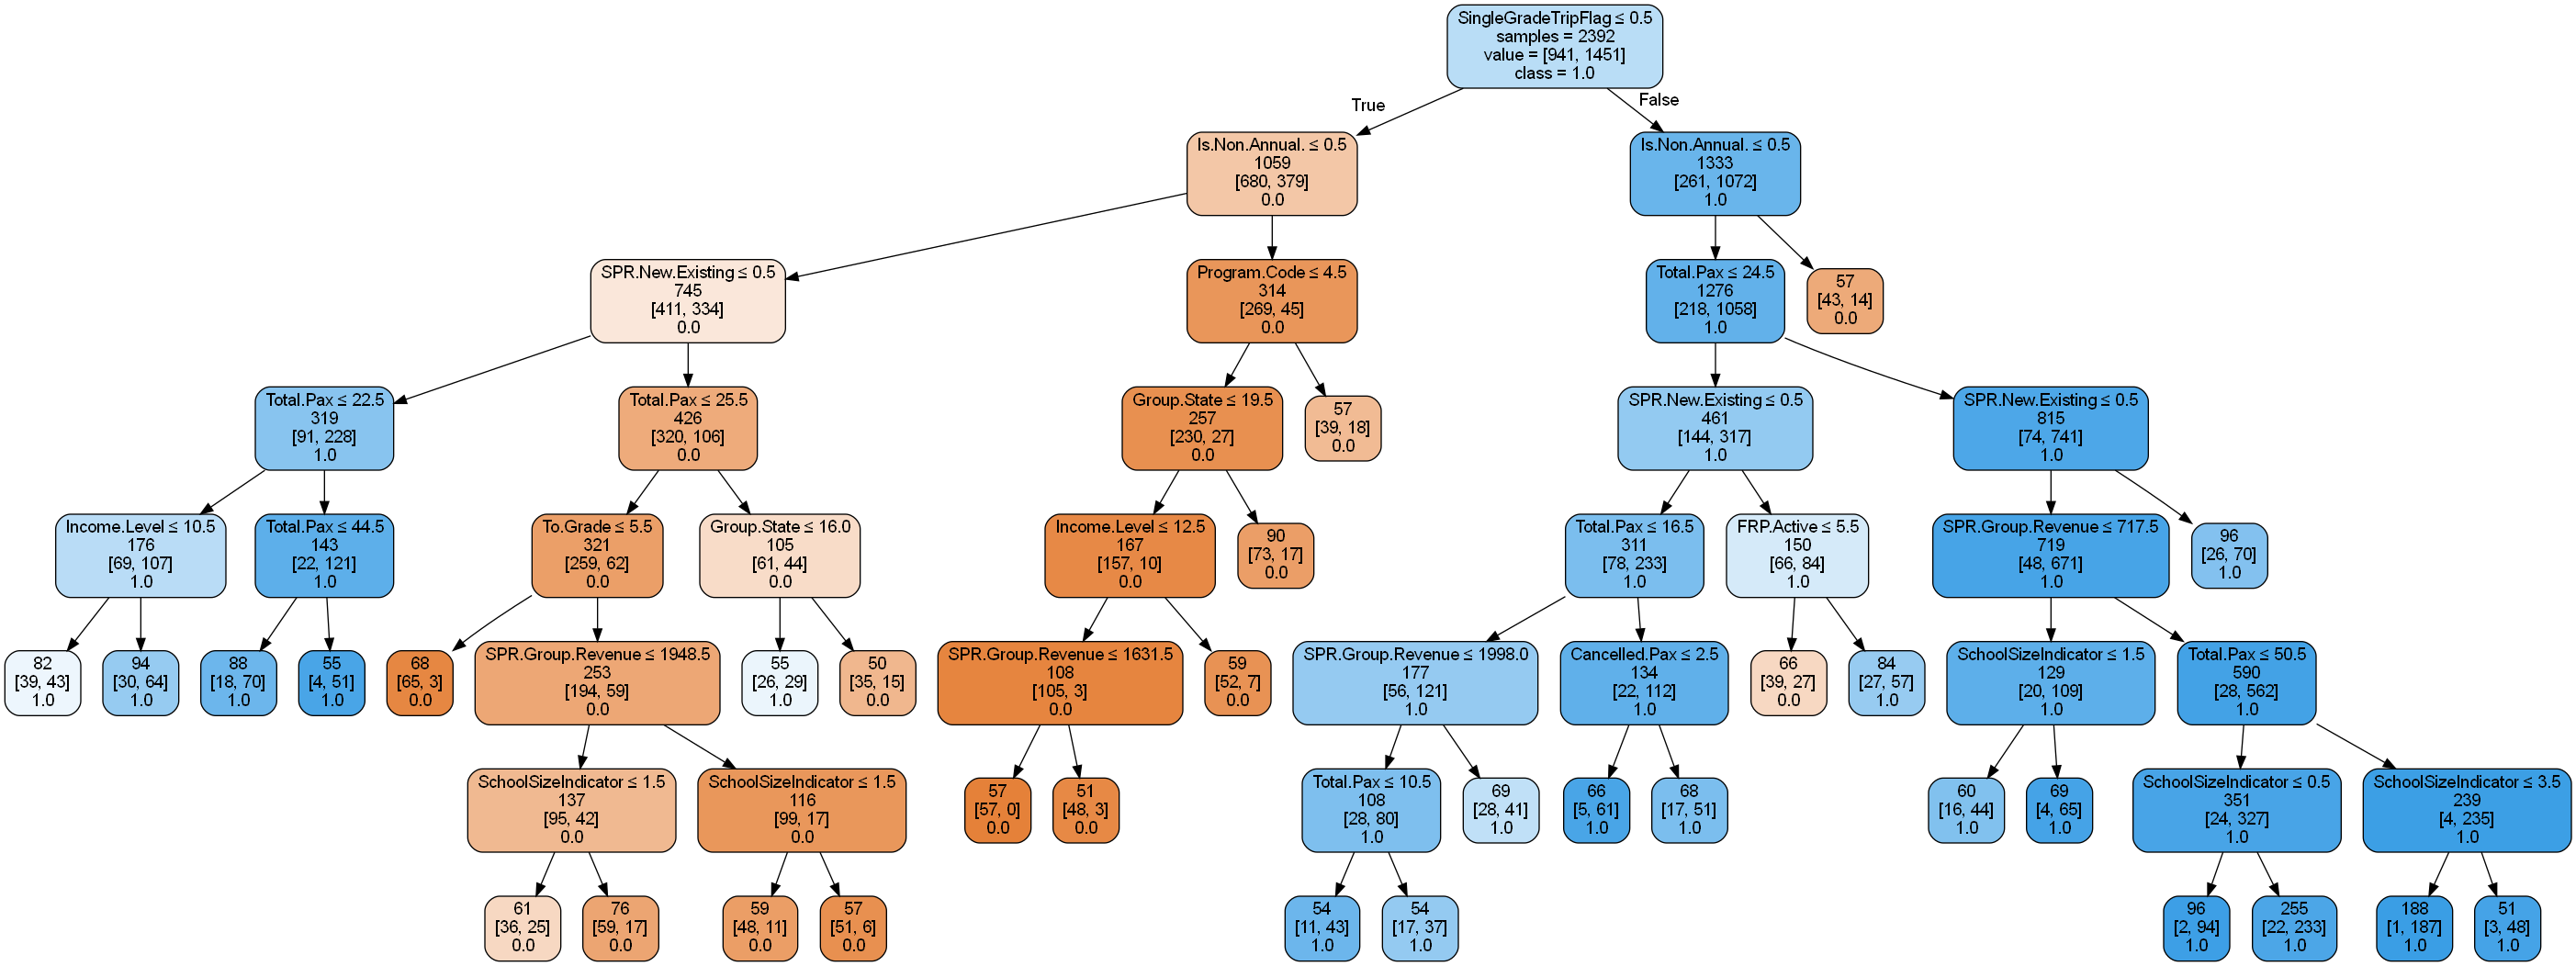

In [205]:
num_features_in_model = classTree.tree_.n_features
print("Number of features in the model:", num_features_in_model)
# Update the feature_names accordingly
feature_names = dfnew.columns[:num_features_in_model]

# Plot the decision tree
plotDecisionTree(classTree, feature_names=feature_names, class_names=classTree.classes_)

In [206]:
classificationSummary(dfnew['Retained.in.2012.'], classTree.predict(dfnew.drop(columns=['Retained.in.2012.'])))

Confusion Matrix (Accuracy 0.8081)

       Prediction
Actual    0    1
     0  645  296
     1  163 1288


In [207]:
# Five-fold cross-validation of the full decision tree classifier
treeClassifier = DecisionTreeClassifier()

scores = cross_val_score(treeClassifier, train_X, train_y, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})')

Accuracy scores of each fold:  ['0.693', '0.721', '0.749', '0.700', '0.718']
Accuracy: 0.716 (+/- 0.039)
Accuracy: 0.716 (+/- 0.019)


In [208]:
param_grid = {
    'max_depth': list(range(2, 12)), 
    'min_samples_split': list(range(15, 25)), 
    'min_impurity_decrease': [0.00001,0.0009, 0.001, 0.0011], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Improved score:  0.7944250871080138
Improved parameters:  {'max_depth': 4, 'min_impurity_decrease': 0.0009, 'min_samples_split': 16}


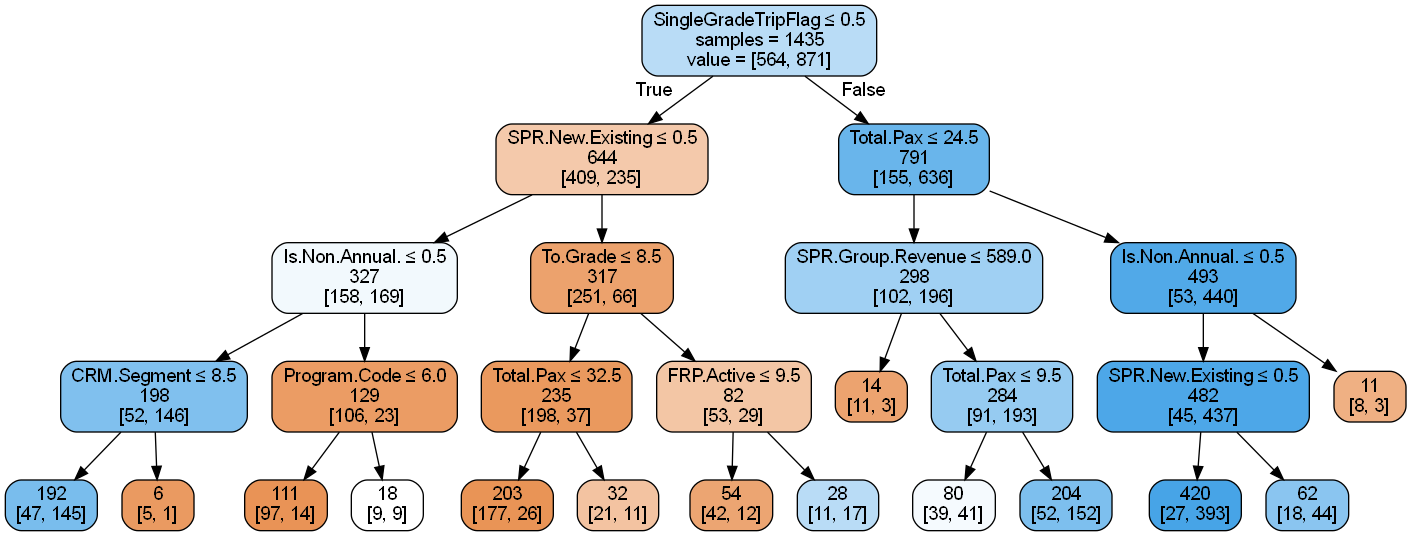

In [209]:
plotDecisionTree(bestClassTree, feature_names=train_X.columns)

In [210]:
classificationSummary(train_y, bestClassTree.predict(train_X))
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.8098)

       Prediction
Actual   0   1
     0 370 194
     1  79 792
Confusion Matrix (Accuracy 0.7827)

       Prediction
Actual   0   1
     0 233 144
     1  64 516


In [218]:
rf = RandomForestClassifier(n_estimators=1200, random_state=2)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=1200, random_state=2)

                        feature  importance       std
16               School.Sponsor    0.005014  0.005426
14          Parent.Meeting.Flag    0.006526  0.004534
6                   Travel.Type    0.007603  0.005418
17             SPR.Product.Type    0.007741  0.006567
22           SchoolGradeTypeLow    0.009551  0.008642
23          SchoolGradeTypeHigh    0.013285  0.012114
13                  School.Type    0.013635  0.007093
21  NumberOfMeetingswithParents    0.016177  0.007021
5                          Days    0.022840  0.009090
11                       Region    0.023079  0.008859
2                      To.Grade    0.024797  0.018234
0                  Program.Code    0.027550  0.011561
24               DepartureMonth    0.028102  0.009715
26          SchoolSizeIndicator    0.031533  0.010876
10           Total.Discount.Pax    0.032880  0.016959
8                 FRP.Cancelled    0.037132  0.011623
3                   Group.State    0.037436  0.011795
12                  CRM.Segm

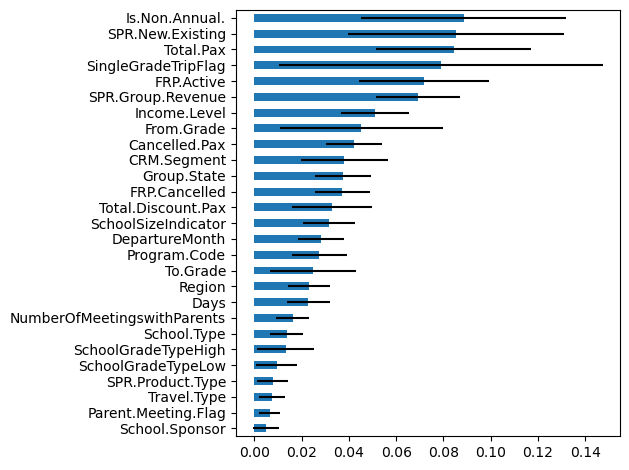

In [221]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

dftree = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
dftree = dftree.sort_values('importance')  # Corrected this line
print(dftree)

ax = dftree.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()


In [222]:
boost = GradientBoostingClassifier()
boost.fit(train_X, train_y)

GradientBoostingClassifier()

In [223]:
classificationSummary(valid_y, boost.predict(valid_X))

Confusion Matrix (Accuracy 0.7994)

       Prediction
Actual   0   1
     0 266 111
     1  81 499


### Logistic Regression

In [224]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
#from mord import LogisticIT #If you're looking for ordinal multi-class (more than 2 levels)
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
from scipy import stats
import math

In [225]:
dfnew.head()

,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,FRP.Active,FRP.Cancelled,Cancelled.Pax,...,SPR.New.Existing,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,SchoolGradeTypeLow,SchoolGradeTypeHigh,DepartureMonth,SingleGradeTripFlag,SchoolSizeIndicator,Retained.in.2012.
0,5,4,4,2,0,0,0,25.0,3.0,3.0,...,0,63.0,424.0,1.0,0,0,5,1,0,1.0
1,1,8,8,1,0,9,0,9.0,9.0,11.0,...,0,25.0,2350.0,2.0,2,2,5,1,0,1.0
2,2,8,8,4,0,5,0,17.0,6.0,6.0,...,0,27.0,1181.0,1.0,2,2,5,1,0,1.0
3,4,9,2,21,1,5,1,0.0,0.0,1.0,...,0,18.0,376.0,0.0,1,1,5,0,2,0.0
4,2,6,8,4,0,8,2,40.0,8.0,9.0,...,0,89.0,865.0,1.0,2,2,5,0,1,0.0


In [226]:
predictors =['Is.Non.Annual.','SPR.New.Existing','SingleGradeTripFlag','Total.Pax','FRP.Active','SPR.Group.Revenue',
            'Income.Level','From.Grade','Cancelled.Pax','FRP.Cancelled','Group.State','SchoolSizeIndicator','NumberOfMeetingswithParents','Total.Discount.Pax','DepartureMonth']
outcome = 'Retained.in.2012.'
X = dfnew[predictors]
y = dfnew[outcome]
logit_reg = sm.GLM(y, X, family=sm.families.Binomial())

#Fit and print results
logit_reg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      Retained.in.2012.   No. Observations:                 2392
Model:                            GLM   Df Residuals:                     2377
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1090.4
Date:                Thu, 30 Nov 2023   Deviance:                       2180.8
Time:                        16:16:17   Pearson chi2:                 2.56e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3487
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Is.Non.Annual.                 -2.4614      0.174    -14.170      0.000      -2.802      -2.121
SPR.New.Existing               -1.5567      0.115    -13.528      0.000      -1.782      -1.331
SingleGradeTripFlag             1.0022      0.113      8.861      0.000       0.781       1.224
Total.Pax                      -0.0039      0.005     -0.765      0.445      -0.014       0.006
FRP.Active                      0.0342      0.007      4.820      0.000       0.020       0.048
SPR.Group.Revenue              -0.0002   8.82e-05     -2.554      0.011      -0.000   -5.24e-05
Income.Level                    0.0222      0.011      2.062      0.039       0.001       0.043
From.Grade                      0.0836      0.028      3.025      0.002       0.029       0.138
Cancelled.Pax                   0.0225      0.022      1.011      0.312      -0.021       0.066
FRP.Cancelled                  -0.0396      0.029     -1.356      0.175      -0.097       0.018
Group.State                    -0.0124      0.006     -2.099      0.036      -0.024      -0.001
SchoolSizeIndicator            -0.0479      0.033     -1.431      0.152      -0.113       0.018
NumberOfMeetingswithParents     0.0091      0.086      0.106      0.916      -0.160       0.178
Total.Discount.Pax              0.0597      0.050      1.202      0.229      -0.038       0.157
DepartureMonth                  0.0520      0.039      1.346      0.178      -0.024       0.128
===============================================================================================
"""

In [227]:
math.exp(-0.0002)

0.9998000199986667

In [228]:
train_X,valid_X,train_y,valid_y=train_test_split(X,y,test_size=0.4,random_state=1)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

#Get intercepts, coefficients, and AIC
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print() #Creates a Line space
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  -0.7946464380365517
       Is.Non.Annual.  SPR.New.Existing  SingleGradeTripFlag  Total.Pax  \
coeff       -2.282645         -1.669682             1.015169  -0.000669   

       FRP.Active  SPR.Group.Revenue  Income.Level  From.Grade  Cancelled.Pax  \
coeff    0.033234          -0.000075      0.038154    0.092592       0.041852   

       FRP.Cancelled  Group.State  SchoolSizeIndicator  \
coeff      -0.049982    -0.004371            -0.032192   

       NumberOfMeetingswithParents  Total.Discount.Pax  DepartureMonth  
coeff                     0.008576            0.052356         0.09513  

AIC 1212.6115779638533


In [230]:
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })

# display four different cases
interestingCases = [221, 932, 276, 703]
logit_result_reset = logit_result.reset_index(drop=True)
print(logit_result_reset.loc[interestingCases])



     actual      p(0)      p(1)  predicted
221     0.0  0.783253  0.216747        0.0
932     1.0  0.665823  0.334177        0.0
276     1.0  0.114383  0.885617        1.0
703     1.0  0.143269  0.856731        1.0


In [231]:
classificationSummary(valid_y,logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.7994)

       Prediction
Actual   0   1
     0 265 112
     1  80 500


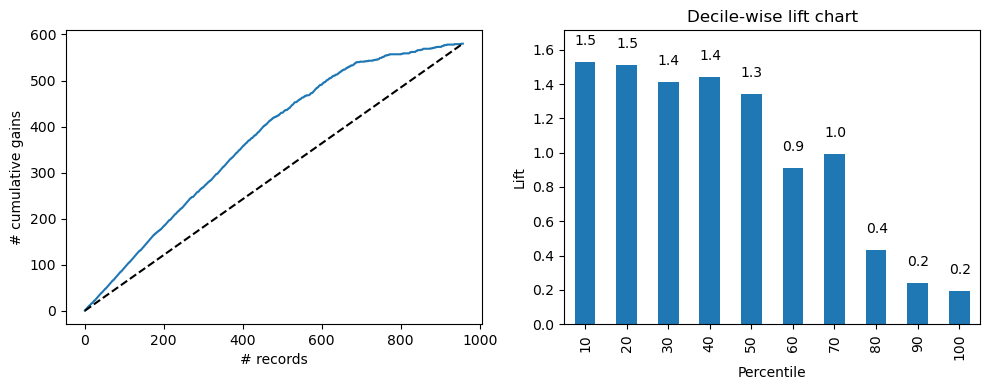

In [232]:
df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df.actual, ax=axes[0])
liftChart(df.actual, title='Decile-wise lift chart', ax=axes[1])
    
plt.tight_layout()
plt.show()

In [240]:
newinput = pd.DataFrame([{'Is.Non.Annual.':1.0,'SPR.New.Existing':1.0,'SingleGradeTripFlag':1,'Total.Pax':55.0,'FRP.Active':6.0,'SPR.Group.Revenue':1885.0,
            'Income.Level':6,'From.Grade':7,'Cancelled.Pax':7.0,'FRP.Cancelled':2.0,'Group.State':20,'SchoolSizeIndicator':1,'NumberOfMeetingswithParents':2,'Total.Discount.Pax':2,'DepartureMonth':4}])
newinput

,Is.Non.Annual.,SPR.New.Existing,SingleGradeTripFlag,Total.Pax,FRP.Active,SPR.Group.Revenue,Income.Level,From.Grade,Cancelled.Pax,FRP.Cancelled,Group.State,SchoolSizeIndicator,NumberOfMeetingswithParents,Total.Discount.Pax,DepartureMonth
0,1.0,1.0,1,55.0,6.0,1885.0,6,7,7.0,2.0,20,1,2,2,4


In [242]:
prob = logit_reg.predict_proba(newinput)
odds = prob[:,1]/prob[:,0]
print(prob[0][1])
print(odds[0])

0.09461730797526377
0.10450532002513552
